# Projeto Machine Learning 1

## 1.1 Apresentação

* Utilização de base de dados de valores de imóveis no Rio de Janeiro
* Formato da base `json`

## 1.2 Carregando os dados


### 1.2.1 Instalando as bibliotecas a serem utilizadas no projeto

In [ ]:
pip install seaborn


In [ ]:
pip install scikit-learn

### 1.2.2 Importação das bibliotecas

In [3]:
import pandas as pd
import numpy as np

* pd.read_json: Este é um método da biblioteca pandas que lê um arquivo JSON e o converte em um DataFrame do pandas. O arquivo JSON é especificado pelo argumento path_or_buf.

* path_or_buf='imoveis.json': Aqui, o método vai ler um arquivo chamado imoveis.json. Este arquivo deve estar no mesmo diretório onde o script está sendo executado, a menos que um caminho completo seja fornecido.

* orient='columns': Este argumento define como o método deve interpretar o arquivo JSON. O valor 'columns' indica que o método deve interpretar as chaves de nível superior como nomes de colunas e as chaves de nível inferior como índices de linha. Este é geralmente o formato mais comum de arquivos JSON quando usados para armazenar dados tabulares.

* df.head(): Este método exibe as primeiras cinco linhas do DataFrame df. É uma maneira rápida de ter uma visão geral dos dados depois de carregá-los.

In [4]:
df = pd.read_json(
    path_or_buf='imoveis.json',
    orient='columns'
    )
df.head()

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."


## 1.3 Explorando as informações

### 1.3.1 ident[0]

O trecho `df.ident[0]` está tentando acessar o primeiro elemento da coluna ident do DataFrame df. Em termos mais simples, ele pega a primeira linha da coluna ident e retorna o valor correspondente.

In [5]:
df.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

### 1.3.2 listing[0]
O trecho `listing[0]` acessa o primeiro elemento da coluna listing do DataFrame.

In [6]:
df.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

## 1.4 Tratamento de dados inicial

### 1.4.1 Normalização

* `pd.json_normalize(df.ident)`: Esta função pega a coluna ident do DataFrame df e tenta normalizá-la. Ou seja, ela tenta transformar qualquer estrutura aninhada de dicionários ou listas de dicionários em um DataFrame "plano". O resultado é armazenado em df_norm.

* `df_norm.head()`: Este método exibe as primeiras cinco linhas do novo DataFrame df_norm. Isso é útil para verificar rapidamente se a normalização ocorreu como esperado.

In [7]:
df_norm = pd.json_normalize(df.ident)
df_norm.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


* `pd.json_normalize(df.listing, sep='_')`: Esta função pega a coluna listing do DataFrame df e tenta normalizá-la, da mesma forma que foi feito com a coluna ident. O parâmetro sep='_' indica que qualquer sub-chave em um dicionário aninhado será separada da chave principal por um sublinhado (_)

In [8]:
df_norm2 = pd.json_normalize(df.listing, sep='_')
df_norm2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


### 1.4.2 Junção dos dataframes

In [9]:
df_final = pd.concat([df_norm, df_norm2], axis=1)
df_final.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [10]:
df_final.shape

(73615, 21)

`for coluna in df_final.columns:`: Este loop percorre todas as colunas do DataFrame df_final. A variável coluna armazenará o nome da coluna atual durante cada iteração.

`print(df_final[coluna].value_counts())`: Este comando imprime a contagem de valores únicos para a coluna atual (coluna) do DataFrame df_final. O método value_counts() é útil para entender a distribuição dos dados em cada coluna, mostrando quantas vezes cada valor único aparece.

In [11]:
for coluna in df_final.columns:
    print('==========='*30)
    print(df_final[coluna].value_counts())

customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
source
Website    73615
Name: count, dtype: int64
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: count, Length: 25753, dtype: int64
address_location_lat

## 1.5 Limpeza

### 1.5.1 Filtro

* `filtro = (df_final['types_usage'] == 'Residencial') & (df_final['address_city'] == 'Rio de Janeiro')`: Esta linha cria uma condição de filtro. A condição verifica duas coisas:

- Se o valor na coluna types_usage é igual a 'Residencial'.
- Se o valor na coluna address_city é igual a 'Rio de Janeiro'.
- A operação & significa que ambas as condições devem ser verdadeiras para o filtro ser aplicado.

* `df_imoveis = df_final[filtro]`: Esta linha aplica o filtro ao DataFrame df_final e armazena o resultado no novo DataFrame df_imoveis. Somente as linhas que atendem às condições do filtro serão incluídas em df_imoveis.

* `df_imoveis.head()`: Este método exibe as primeiras cinco linhas do DataFrame df_imoveis. Isso é útil para verificar rapidamente se o filtro foi aplicado corretamente.

Assim, o resultado final será um novo DataFrame df_imoveis que contém apenas as linhas de df_final onde types_usage é 'Residencial' e address_city é 'Rio de Janeiro'. Isso é útil para isolar o subconjunto de dados que será analisado.

In [12]:
filtro = (df_final['types_usage'] == 'Residencial') & (df_final['address_city'] == 'Rio de Janeiro')

# aplicando o filtro
df_imoveis = df_final[filtro]
df_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


### 1.5.2 Tipos de variáveis

In [13]:
# Tipo das variáveis e o índice
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

Verificando a saída do `.info`

> 69588 entries, 0 to 73614

 percebemos que temos que resentar o index, para que as infos fiquem ordenadas corretamente.

 Prices estão como objeto
 
 Dados faltantes
 
 

In [14]:
df_imoveis.reset_index(drop=True, inplace=True)

In [15]:
# mostrar o RangeIndex
df_imoveis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Agora está correto.

### 1.5.3 Transformando o tipo de dados de string para numéricas

In [16]:
df_imoveis = df_imoveis.astype({
    'prices_price': 'float64',
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64',
})

df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

## 1.6 - Tratamento de dados final

### 1.6.1  Lidando com dados nulos

#### Dados nulos zone

In [17]:
df_imoveis.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

* `.replace('', np.nan)`: A função replace() está configurada para substituir todas as ocorrências de uma string vazia ('') por NaN.

In [18]:
df_imoveis['address_zone'] = df_imoveis['address_zone'].replace('', np.nan)

In [19]:
# verificação
df_imoveis.address_zone.isnull().sum()

149

* `~df_imoveis['address_zone'].isna()`: Este filtro seleciona apenas as linhas onde address_zone não é NaN. Ele inverte uma série booleana criada pelo método `isna()`.

* `drop_duplicates(subset=['address_neighborhood'])`: Este método remove as linhas duplicadas com base na coluna address_neighborhood. Ou seja, apenas a primeira ocorrência de cada bairro será mantida.

* `to_dict('records')`: Este método converte o DataFrame filtrado e deduplicado em uma lista de dicionários, onde cada dicionário representa uma linha do DataFrame.

O resultado será um dicionário que contém informações de bairros únicos, excluindo aqueles onde a informação sobre a zona está ausente.

In [20]:
dict_adress = df_imoveis[~df_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records')
print(dict_adress)   

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

Realizando a verificação do passo efetudo acima

In [21]:
dict_zona = {dict['address_neighborhood'] : dict['address_zone'] for dict in dict_adress}
print(dict_zona)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

Atualizando a coluna `address_zone`

In [22]:
for bairro, zona in dict_zona.items():
    df_imoveis.loc[df_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [23]:
df_imoveis['address_zone'].isnull().sum()

0

#### Dados nulos prices

In [24]:
df_imoveis.prices_tax_iptu.isnull().sum()

8725

In [25]:
df_imoveis.prices_tax_condo.isnull().sum()

6061

Preenchendo qualquer valor NaN (Not a Number) nessas colunas com 0.

In [26]:
df_imoveis.prices_tax_iptu.fillna(0, inplace=True)
df_imoveis.prices_tax_condo.fillna(0, inplace=True)

In [27]:
print(f'''
      Total de prices nulos: {df_imoveis.prices_price.isnull().sum()}
      Total de prices_tax_condo nulos: {df_imoveis.prices_tax_condo.isnull().sum()}
      ''')


      Total de prices nulos: 0
      Total de prices_tax_condo nulos: 0
      


### 1.6. 2 Alterar o nome das colunas e seleção de variáveis

In [28]:
df_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city',
                 'address_location_lon', 'address_location_lat', 'address_neighborhood'], axis=1, inplace=True)

In [29]:
dict_columns = {
    'types_unit': 'unit',
    'address_zone': 'zone',
    'prices_price': 'price',
    'prices_tax_condo': 'tax_condo',
    'prices_tax_iptu': 'tax_iptu',
    'features_bedrooms': 'bedrooms',
    'features_bathrooms': 'bathrooms',
    'features_parkingSpaces': 'parkingSpaces',
    'features_usableAreas': 'usableAreas',
    'features_totalAreas': 'totalAreas',
    'features_floor': 'floor',
    'features_unitsOnTheFloor': 'unitsOnTheFloor',
    'features_unirFloor': 'unirFloor'
}

df_imoveis = df_imoveis.rename(dict_columns, axis=1)
df_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,features_suites,parkingSpaces,usableAreas,totalAreas,features_floors,unitsOnTheFloor,features_unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


# Regressão linear

## 2.1 - Correlação

*   Correlação: grau da relação entre variáveis. Pode ser positiva ou negativa essa relação. 

*   Multicolinearidade: relação perfeita ou exata entre variáveis.


In [30]:


# Calculando a matriz de correlação apenas para as colunas numéricas
correlacao = df_imoveis.select_dtypes(include=['float64', 'int64']).corr()
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,features_suites,parkingSpaces,usableAreas,totalAreas,features_floors,unitsOnTheFloor,features_unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
features_suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
features_floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

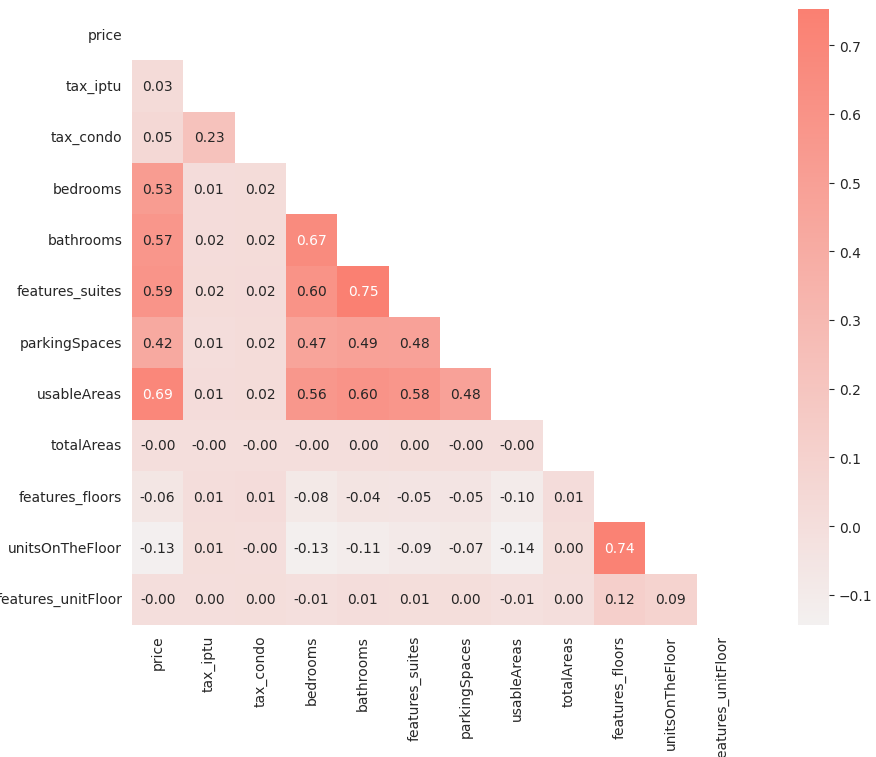

In [32]:
# Visulaização das correlações

cores = sns.color_palette('light:salmon', as_cmap=True)
# Máscara para aparecer somente uma parte do gráfico
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, mask=mask, cmap=cores, annot=True, fmt='.2f', square=True)

Análise da distribuição da variável resposta.

Text(0.5, 0, 'Preço')

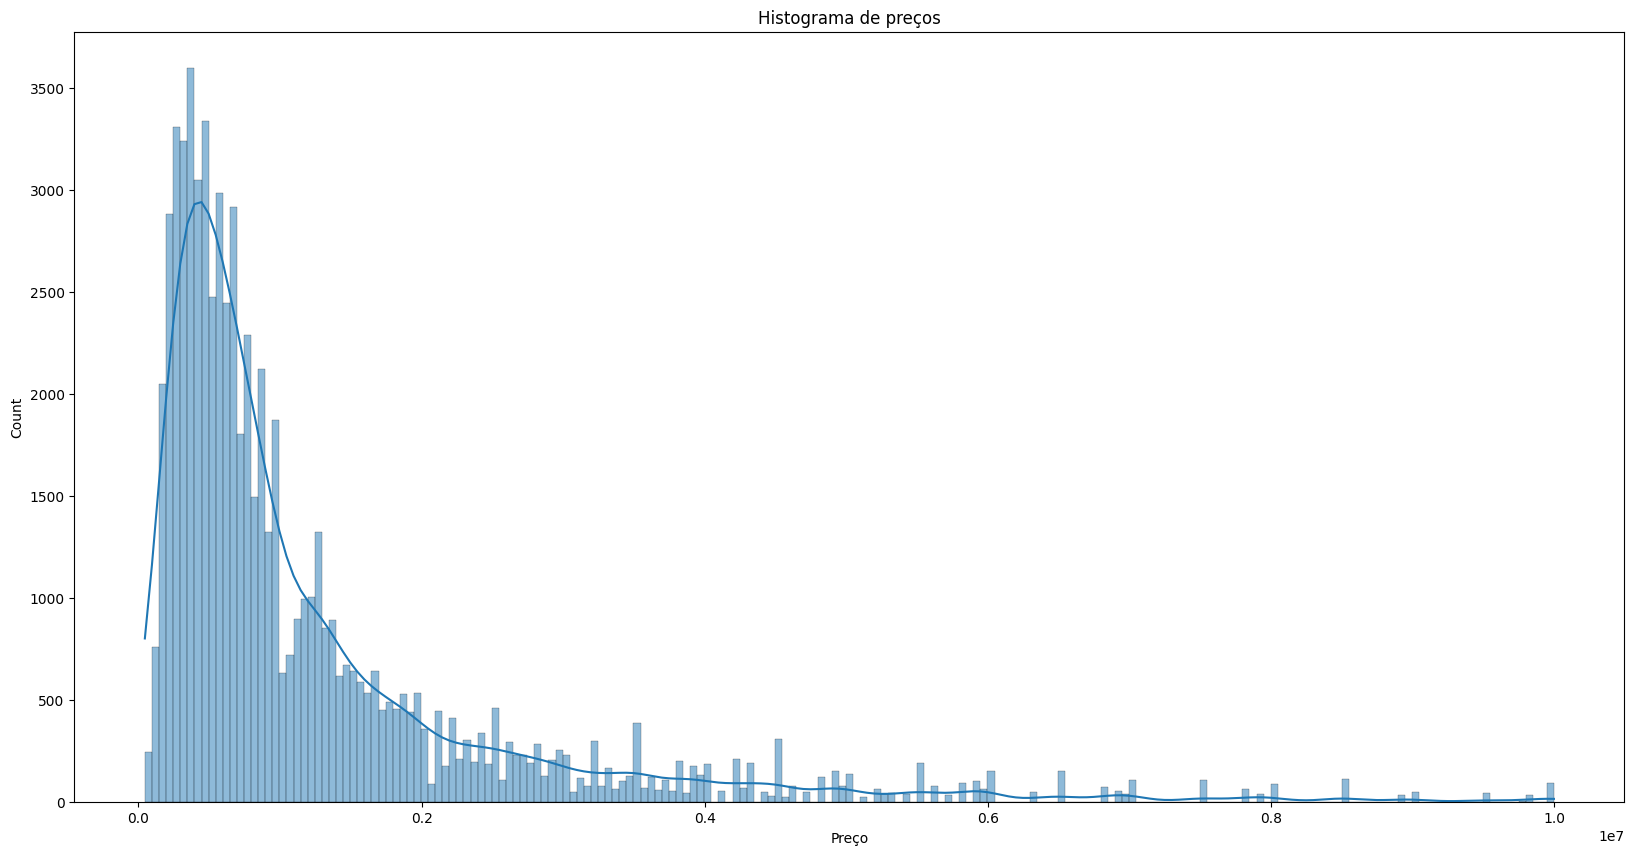

In [33]:
# Antes (distribuição assimetrica a direita)
ax = sns.histplot(data=df_imoveis, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

### Transformação das variáveis 

Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:


$$log1p = log(1+x)$$


Lembrar de realizar a transformação inversa para obter o valor original:


$$expm1 = exp(x) - 1$$ 


* Cria um objeto FunctionTransformer que usa a função `np.log1p` (logaritmo natural de x+1) para transformar os dados. O argumento validate=True garante que os dados sejam validados antes da transformação.
* Seleciona apenas as colunas numéricas de `df_imoveis` (excluindo colunas do tipo `'object'`) e aplica a transformação logarítmica.
* Concatena as colunas originais do tipo `'object'` com as novas colunas transformadas em um novo DataFrame chamado `df_transformado`.

In [34]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(df_imoveis.select_dtypes(exclude=['object']))

coluna_dados_transformados = df_imoveis.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([df_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=coluna_dados_transformados)], axis=1)
df_transformado.head()

c:\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,features_suites,parkingSpaces,usableAreas,totalAreas,features_floors,unitsOnTheFloor,features_unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


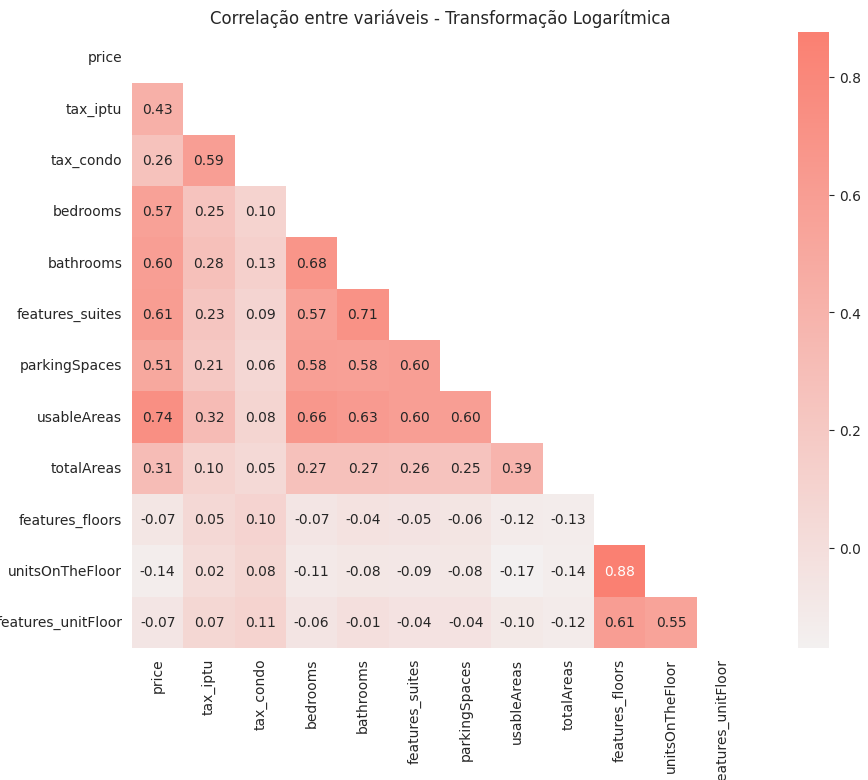

In [35]:
# Depois da transformação
correlacao_transformado = df_transformado.select_dtypes(include=['float64', 'int64']).corr()
cores = sns.color_palette('light:salmon', as_cmap=True)
# Máscara para aparecer somente uma parte do gráfico
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, mask=mask, cmap=cores, annot=True, fmt='.2f', square=True)
    ax.set_title('Correlação entre variáveis - Transformação Logarítmica')

Text(0.5, 0, 'Preço')

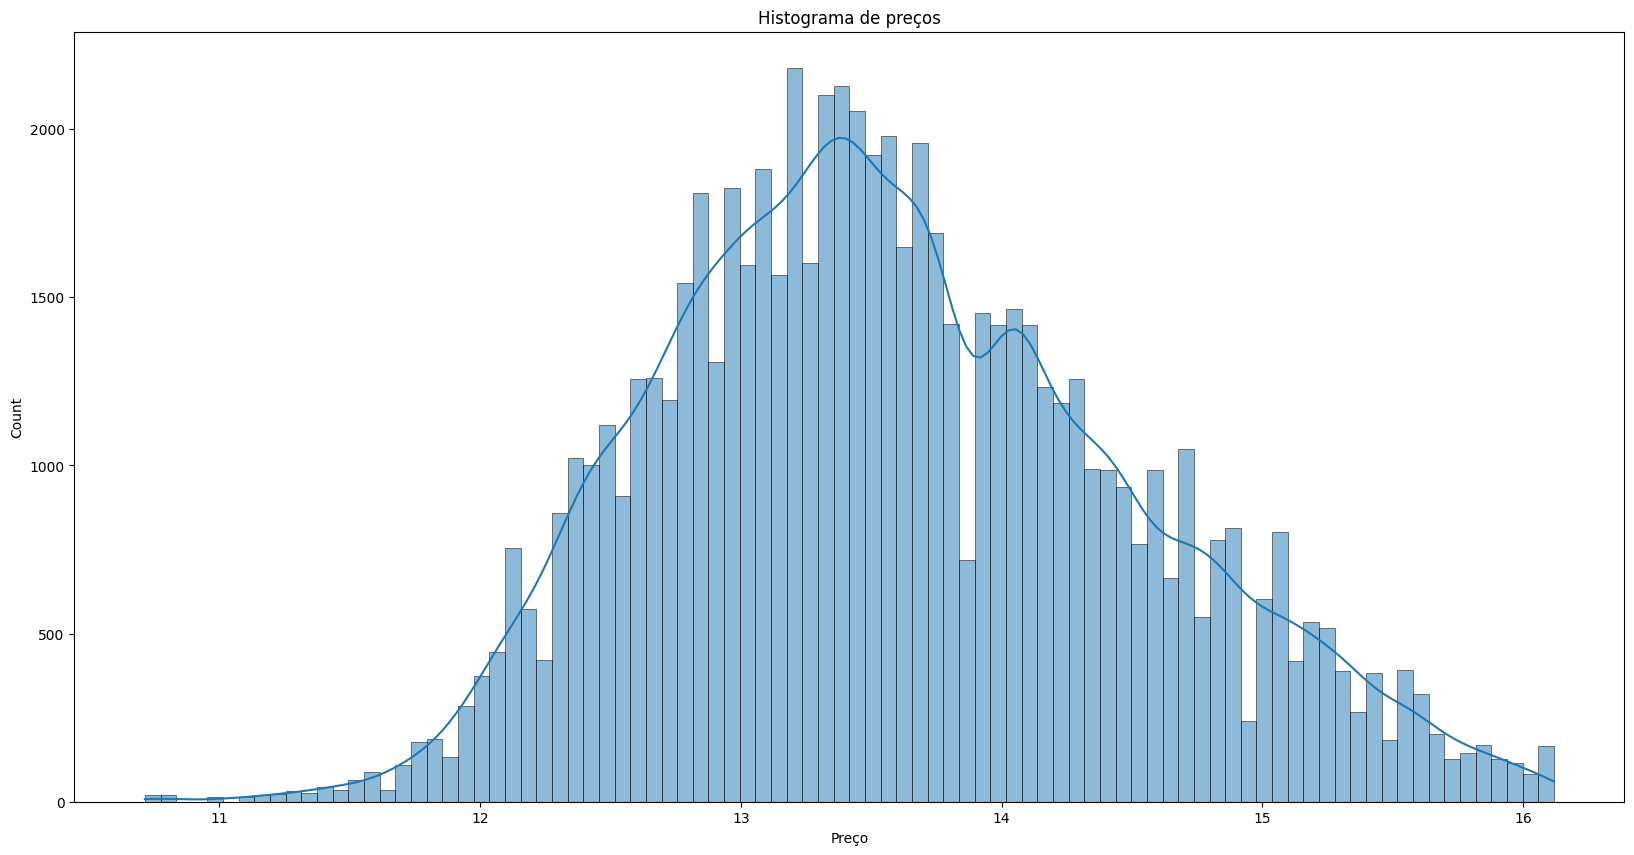

In [36]:
# Depos da transformação (distribuição simétrica)
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço')

## 2.2 Dummies

* Seleciona todas as colunas do DataFrame `df_transformado` que são do tipo `'object'` e armazena os nomes dessas colunas na variável `variaveis_categoricas`.

* O método `select_dtypes` é usado para filtrar as colunas com base no tipo de dado. O argumento `include=['object']` especifica que queremos selecionar apenas as colunas que têm o tipo de dado 'object', que geralmente são colunas contendo dados categóricos ou de texto.

* O atributo `.columns` retorna os nomes das colunas selecionadas como um objeto de índice do pandas, que é então armazenado na variável `variaveis_categoricas`.

In [37]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns

In [38]:
variaveis_categoricas

Index(['unit', 'zone'], dtype='object')

* `df_transformado[variaveis_categoricas]`: Este código seleciona apenas as colunas em `df_transformado` que estão listadas em variaveis_categoricas, que são as colunas do tipo `'object'` ou categóricas.

* `pd.get_dummies(...)`: Este método converte variáveis categóricas em um formato chamado "one-hot encoding". Em outras palavras, para cada valor único em cada coluna categórica, uma nova coluna é criada. Essa nova coluna terá um valor de 1 onde o valor original da coluna correspondia ao valor único e 0 em todos os outros lugares.

* `.astype(int)`: Converte os tipos de dados das novas colunas para inteiros. Isso é feito porque o "one-hot encoding" gera valores de 0 e 1, que são melhor representados como inteiros.

* `df_dummies.head()`: Exibe as primeiras cinco linhas do novo DataFrame df_dummies para verificar se a conversão foi bem-sucedida.

In [39]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas]).astype(int)
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


Combinando o DataFrame `df_transformado` e o DataFrame `df_dummies` para criar um novo DataFrame chamado `df_imoveis_dummies`. O objetivo é substituir as colunas categóricas em `df_transformado` pelas suas versões "one-hot encoded" em `df_dummies`.

In [40]:
df_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1)
df_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,features_suites,parkingSpaces,usableAreas,totalAreas,features_floors,unitsOnTheFloor,features_unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0


## 2.3 - Regressão Linear

* "A análise de regressão diz respeito ao estudo da dependência de uma variável, a variável dependente, em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio (da população) da primeira em termos dos valores conhecidos ou fixados (em amostragens repetidas) das segundas."

* Regressão Simples: a variável dependente (regressando ou `y`) se relaciona a uma única variável explanatória (regressor ou `X`).




## 2.4 - Ajuste e Previsão

### 2.4.1 Divisão dos dados

In [41]:
# Variáveis explanatórias independentes
X = df_imoveis_dummies.drop('price', axis=1)

# Variável resposta
y = df_imoveis_dummies['price']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Divisão em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.4.2 Modelo

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
# Instanciando o modelo
lr = LinearRegression()

In [46]:
# Treino do modelo
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Teste
previsao = lr.predict(X_test)

In [49]:
# Resultado da previsão
previsao

array([13.2585144 , 12.4586792 , 12.91726685, ..., 13.13250732,
       12.42532349, 14.49423218])

In [50]:
# Transformação inversa (Exponencial)
np.expm1(previsao)

array([ 572926.46771888,  257474.33271578,  407283.34045778, ...,
        505096.78552655,  249027.71406493, 1971354.97818502])

## 2.5 - Métrica de desempenho

### 2.5.1 Coeficiente de Determinação 

* descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
* r2 situa-se entre 0 e 1
* "r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."





In [52]:
# Importando as métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

* Coeficiente de Determinação (R2): É uma estatística que fornece alguma informação sobre a qualidade do ajuste de um modelo. Em regressão, o coeficiente de determinação (R2 ) é uma estatística usada para avaliar o ajuste do modelo aos dados observados. 
* Erro Médio Absoluto (MAE): É uma métrica que dá uma ideia de quão erradas estão as previsões do modelo.
* Erro Quadrático Médio (MSE): É semelhante ao MAE, mas penaliza erros maiores, o que tende a ser útil no mundo real, onde grandes erros são frequentemente mais problemáticos do que erros menores.

In [54]:
r2_lr = r2_score(y_test, previsao)
mae_lr = mean_absolute_error(y_test, previsao)
mse_lr = mean_squared_error(y_test, previsao)
print(f'''
      R2: {r2_lr}
      MAE: {mae_lr}
      MSE: {mse_lr}
      ''')


      R2: 0.7880624393918747
      MAE: 0.3120841329740229
      MSE: 0.1735169243972737
      


* R-quadrado (R2): R2 de 0,788 sugere que cerca de 78,8% da variabilidade na variável de resultado pode ser explicada pelo modelo, o que geralmente é considerado bom.

* Erro Médio Absoluto (MAE): Este é uma média dos erros absolutos entre os valores previstos e reais. Valores mais baixos de MAE são melhores. Seu MAE de 0,312 sugere que, em média, as previsões do seu modelo estão desviando cerca de 0,312 unidades do valor real.

* Erro Quadrático Médio (MSE): Este é uma média dos quadrados dos erros entre os valores previstos e os reais. Valores mais baixos de MSE são melhores. Um MSE de 0,174 sugere que o modelo está indo razoavelmente bem, embora seja geralmente mais difícil interpretar esta métrica isoladamente, sem um contexto ou um ponto de referência.

## 3 - Árvore de Decisão para Regressão






## 3.1 - Árvore de Decisão Classificação versus Regressão


## 3.2 - Implementando o Modelo


In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
# Instanciando o modelo
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)

In [57]:
# Treino
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [58]:
# Teste
previsao_dtr = dtr.predict(X_test)

In [59]:
previsao_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Gráfico de erro de predição**: Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos. Em um modelo perfeito, esses pontos estariam alinhados em 45 graus.


Utilizamos a biblioteca YellowBrick 



In [ ]:
pip install yellowbrick

In [62]:
from yellowbrick.regressor import PredictionError

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


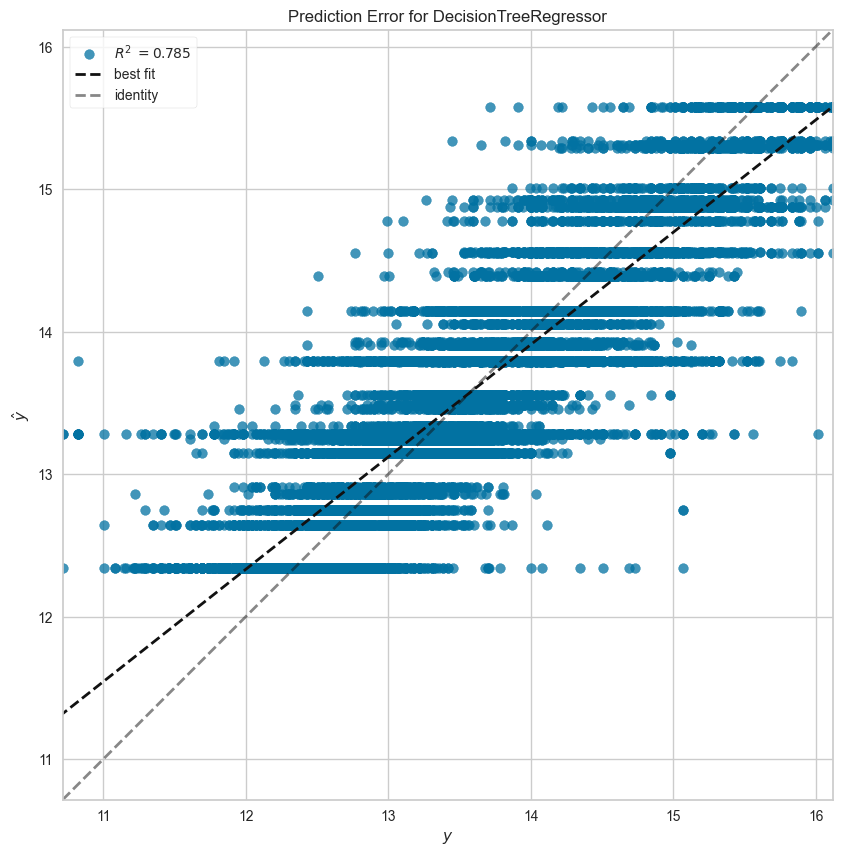

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.show()

## 3.3 - Métrica

In [64]:
# Coeficiente de determinação
r2_dtr = r2_score(y_test, previsao_dtr)
r2_dtr

0.7846916218477392

# 4 - Random Forest para Regressão


## 4.1 - Previsão

Os parâmetros são praticamente os mesmos entre o `DecisionTreeRegressor()` e o `RandomForestRegressor()`, com exceção de:

* `n_estimators`: quantidade de árvores na floresta
* `max_depth`: quantidade máxima de profundidade das árvores
* `random_state`: valor de semente para o gerador de números aleatórios. Definindo uma semente garante que o modelo seja reproduzível


In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
rf = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=42)

In [67]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [68]:
previsao_rf = rf.predict(X_test)

## 4.2 Gráfico de erro de predição

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


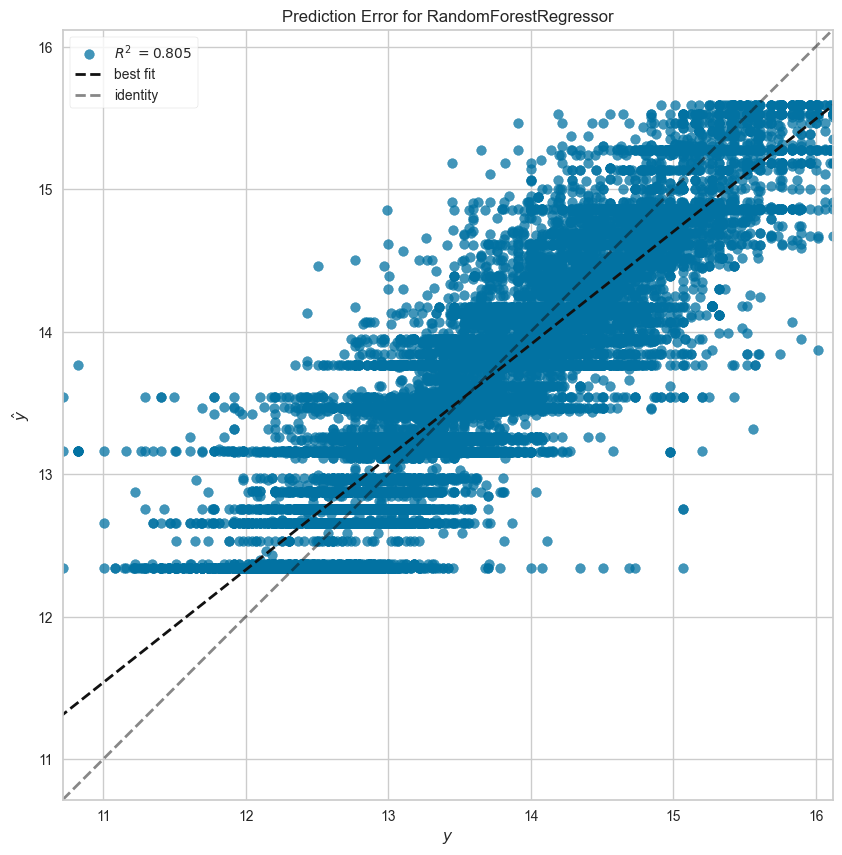

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 4.3 - Métrica de desempenho

In [74]:
r2_rf = r2_score(y_test, previsao_rf)
mae_rf = mean_absolute_error(y_test, previsao_rf)
mse_rf = mean_squared_error(y_test, previsao_rf)
print(f'''
      R2: {r2_rf}
      MAE: {mae_rf}
      MSE: {mse_rf}
      ''')


      R2: 0.805273364453047
      MAE: 0.2986408902164308
      MSE: 0.15942604416784414
      


# 5 - Otimização


## 5.1 - Ferramentas de Otimização


### 1. Cross Validation (Validação Cruzada)


* **Cross Validation** é uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina. Ele consiste em particionar os dados em subconjuntos (partes), onde um subconjunto é utilizado para treino e outro subconjunto é utilizado para teste e avaliação do desempenho do modelo.

* Os dados particionados são os de treino (70% dos dados originais)!

* **K-fold**: conjunto de treino é dividido de forma aleatória em K subconjuntos de aproximadamente mesmo tamanho, depois são realizados K iterações, onde K-1 subconjuntos são para treino e 1 para validação.

* O desempenho calculado pela validação cruzada k-fold é a média de todos os valores calculados em cada iteração.


### 2. Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)

* "Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio."


## 5.2 - Otimizando a árvore de decisão

In [75]:
# Divisão do dataset em 3 pedaços
from sklearn.model_selection import KFold

# Definindo o número de k
cv = KFold(n_splits=5, shuffle=True)

### 5.2.1 Cross validation


In [76]:
from sklearn.model_selection import cross_val_score

In [80]:
desempenho_cross_val_r2 = cross_val_score( estimator=dtr,
                                          X = X_train,
                                          y = y_train,
                                          scoring='r2',
                                          cv=cv)

print(f'Desempenho médio de r2: {round(desempenho_cross_val_r2.mean(), 3)}')

Desempenho médio de r2: 0.782


### 5.2.2 Random Search Validação

In [88]:
# Seleção de Hiperparâmetros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_split': [8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'max_features': ['sqrt', 'log2']
}

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
)

In [91]:
randomcv_dtr = random_cv_dt.fit(X_train, y_train)

In [92]:
pd.DataFrame(randomcv_dtr.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.070361,0.006250,0.004004,0.000449,14,10,log2,14,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.831748,0.843350,0.841923,0.843328,0.839844,0.840039,0.004338,1
1,24.482180,0.572170,0.003613,0.000730,14,10,sqrt,12,absolute_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.821851,0.829752,0.828529,0.829855,0.821512,0.826300,0.003801,2
2,20.843390,4.544147,0.003603,0.001657,16,10,log2,12,absolute_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.821851,0.829752,0.828529,0.829855,0.821512,0.826300,0.003801,2
0,0.068518,0.012569,0.007212,0.003884,12,8,log2,10,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.816135,0.828237,0.819617,0.819348,0.820892,0.820846,0.004014,4
4,0.051151,0.006966,0.003505,0.001143,16,8,log2,8,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.793411,0.796516,0.785169,0.794422,0.796518,0.793207,0.004196,5


In [93]:
# A melhor combinação
randomcv_dtr.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_features': 'log2',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [94]:
# o Melhor score
randomcv_dtr.best_score_

0.8400385881042094

### 5.2.3 Random Search Teste

* `criterion='squared_error'`: Este é o critério utilizado para medir a qualidade de uma divisão na árvore. O `'squared_error'` minimiza o erro quadrático médio para fazer as divisões.

* ` max_depth=14`: Este é o parâmetro que controla a profundidade máxima da árvore. Uma árvore mais profunda captura mais detalhes e, portanto, pode levar a modelos mais complexos. No entanto, isso também pode resultar em sobreajuste. Neste caso, a profundidade máxima é definida como 14.

* `max_features='log2`': O número de recursos a serem considerados ao procurar a melhor divisão. `'log2'` significa que o número de recursos usados será log2 (n), onde n é o número de recursos disponíveis.

* `min_samples_leaf=10`: O número mínimo de amostras que devem existir em um nó folha. Isso é usado para controlar o sobreajuste, definindo um limite para o número mínimo de amostras que podem ser usadas para fazer uma previsão.

* `min_samples_split=14`: O número mínimo de amostras necessárias para dividir um nó interno. Isso também é usado para controlar o sobreajuste.

In [95]:
dtr_otimizado = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 14, max_features= 'log2', min_samples_leaf= 10, min_samples_split= 14)

In [97]:
dtr_otimizado.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, max_features='log2', min_samples_leaf=10,
                      min_samples_split=14)

In [98]:
predicao_dtr_otimizado = dtr_otimizado.predict(X_test)

In [99]:
r2_score(y_test, predicao_dtr_otimizado)

0.8418944619723038

## 5.3 - Otimizando a Random Forest

### 5.3.1 Cross validation

In [100]:
desempenhoRF_cross_val_r2 = cross_val_score( estimator=rf,
                                            X = X_train,
                                            y = y_train,
                                            scoring='r2',
                                            cv=cv)
print(f'Desempenho médio de r2: {round(desempenhoRF_cross_val_r2.mean(), 3)}')

Desempenho médio de r2: 0.8


### 5.3.2 Random Search Validação

Definindo os parâmetros

In [101]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3]
}

In [104]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

In [105]:
rf_randomcv = random_cv_rf.fit(X_train, y_train)

In [106]:
pd.DataFrame(rf_randomcv.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,53.210369,1.159596,0.346955,0.006928,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.888792,0.895989,0.895055,0.897377,0.895836,0.894610,0.003004,1
0,53.072493,1.369634,0.342674,0.013785,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.888720,0.895871,0.894989,0.897393,0.895740,0.894543,0.003014,2
2,38.954940,0.383168,0.254823,0.016437,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.888632,0.895720,0.894878,0.897221,0.895607,0.894412,0.002988,3
3,50.242454,0.668480,0.313614,0.023570,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.888334,0.895703,0.894752,0.897066,0.895389,0.894249,0.003053,4
4,35.590795,3.370284,0.220461,0.020916,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.888195,0.895470,0.894589,0.896877,0.895212,0.894069,0.003031,5


In [107]:
# Aplicando os melhores parametros
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [109]:
# Resultado do melhor score após a aplicação dos melhores parametros
rf_randomcv.best_score_

0.8946100210630579

### 5.3.3 Random Search Teste

In [110]:
rf_otimizado2 = RandomForestRegressor(n_estimators=200, min_samples_split=8, min_samples_leaf=3, max_depth=30)

In [111]:
rf_otimizado2.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200)

In [112]:
predicao_rf_otimizado2 = rf_otimizado2.predict(X_test)

In [113]:
r2_score(y_test, predicao_rf_otimizado2)

0.895258499536122

## 5.4 - Escolhendo o melhor modelo

In [116]:
# Tabela de Resultados
print('Random Search')
print('='*30)
print(f'Decision Tree: {round(r2_score(y_test, predicao_dtr_otimizado), 3)}')
print(f'Random Forest: {round(r2_score(y_test, predicao_rf_otimizado2), 3)}')
print('='*30)

print('Cross Validation')
print('='*30)
print(f'Decision Tree: {round(desempenho_cross_val_r2.mean(), 3)}')
print(f'Random Forest: {round(desempenhoRF_cross_val_r2.mean(), 3)}')


Random Search
Decision Tree: 0.842
Random Forest: 0.895
Cross Validation
Decision Tree: 0.782
Random Forest: 0.8


In [123]:
# Testando o melhor modelo
teste_01 = pd.DataFrame({'tax_iptu': [4.6], 'tax_condo': [5.45], 'bedrooms':[2], 'bathrooms': [1], 'features_suites': [1], 'parkingSpaces':[1], 
                         'usableAreas':[4], 'totalAreas': [4.65], 'features_floors': [0], 'unitsOnTheFloor':[0],'features_unitFloor':[0], 'unit_Apartamento':[0],
                         'unit_Casa':[1], 'unit_Outros':[0], 'zone_Zona Central':[0], 'zone_Zona Norte':[0], 'zone_Zona Oeste':[1], 'zone_Zona Sul':[0]})
teste_01

,tax_iptu,tax_condo,bedrooms,bathrooms,features_suites,parkingSpaces,usableAreas,totalAreas,features_floors,unitsOnTheFloor,features_unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.65,0,0,0,0,1,0,0,0,1,0


In [125]:
# Verificando o resultado
predicao_teste_01 = rf_otimizado2.predict(teste_01)
valor_imovel=np.expm1(predicao_teste_01)

In [128]:
print(f'O valor do imóvel é de R$ {valor_imovel[0]:.2f}')

O valor do imóvel é de R$ 276957.78
